***
## Principal Component Analysis (PCA)
***

#### Goal

- PCA finds a new set of dimensions such that all the dimensions are orthogonal (and hence linearly independent) and ranked according to the variance of data along them.
- Find a transformation such that 
    - The transformed features are linearly independent.
    - Dimensionslity can be reduced by taking only the dimensions with the highest importance.
    - Those newly found dimensions should minimize the projection error. 
    - The projected points should have maximum variace (spread).

#### Variance

$$Var(X) = \frac{1}{n} \sum \left ( X_i - \bar{X} \right )^2$$

#### Covariance Matrix

$$Cov(X, Y) = \frac{1}{n} \sum \left ( X_i - \bar{X} \right )\left ( Y_i - \bar{Y} \right )^T$$

#### Eigenvectors, Eigenvalues

The eigenvectors points in the direction of the maximum variance, and the corresponding eigenvalues indicates the importance of its corresponding eigenvector.

$$A \vec{v} = \lambda \vec{v}$$

#### Approach

- Subtract the mean from $X$.
- Calculate $Cov(X,X)$.
- Calculate eigenvectors and eigenvalues of covariance matrix.
- Sort the eigenvectors according to their eigenvalues in decreasing order.
- Choose first k eigenvectors and that will be the new k dimensions.
- Transform the original n dimensional data points into k dimensions. (Projections with dot product)

***

In [1]:
import numpy as np

class PCA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        # covariance, function needs samples as columns
        cov = np.cov(X.T)
        # eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvectors
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        # store first n eigenvectors
        self.components = eigenvectors[0:self.n_components]

    def transform(self, X):
        # project data
        X = X - self.mean
        return np.dot(X, self.components.T)

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


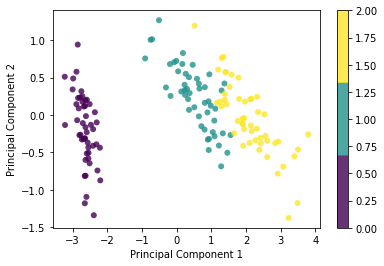

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np


#data = datasets.load_digits()
data = datasets.load_iris()
X = data.data
y = data.target

# Project the data onto the 2 primary principal components
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

print('Shape of X:', X.shape)
print('Shape of transformed X:', X_projected.shape)

x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(x1, x2,
            c=y, edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap('viridis', 3))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

## References
- [PCA (Principal Component Analysis) in Python - Machine Learning From Scratch 11 - Python Tutorial](https://youtu.be/52d7ha-GdV8?list=PLqnslRFeH2Upcrywf-u2etjdxxkL8nl7E)
- [MLfromscratch](https://github.com/python-engineer/MLfromscratch/blob/master/mlfromscratch/pca.py)